In [1]:
# Importing libraries
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("C:/Users/Smit Bhoir/Desktop/Placements/Study content/Deep Learning/Projects/Semtiment Analysis and Rating Prediction/IMDB Dataset.csv")

In [3]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
df.shape

(50000, 2)

# 1. Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [6]:
# Checking for missing values
df.isnull().values.any()

False

In [7]:
# checking for duplicated value
df.duplicated().sum()

418

In [8]:
# remove Duplicate
df=df.drop_duplicates(keep='first')

In [9]:
df.shape

(49582, 2)

# 2. EDA

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='sentiment', ylabel='count'>

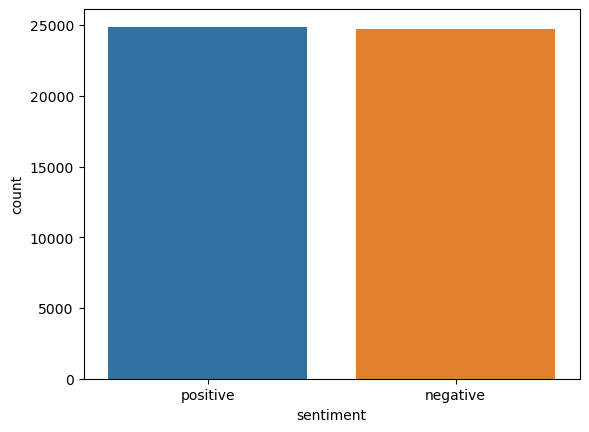

In [11]:
sns.countplot(x='sentiment',data=df,)

([<matplotlib.patches.Wedge at 0x18a7d87d250>,
 [Text(-0.006481911407536943, 1.0999809020271694, 'positve'),
  Text(0.006482014395181169, -1.0999809014202842, 'negative')],
 [Text(-0.0035355880404746957, 0.5999895829239105, '50.19'),
  Text(0.0035356442155533648, -0.5999895825928822, '49.81')])

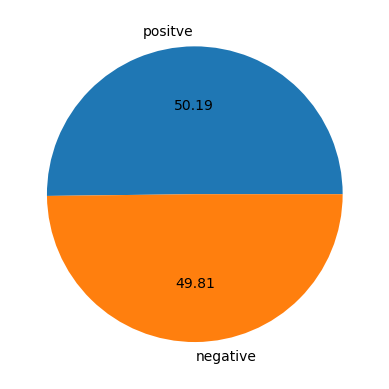

In [12]:
plt.pie(df['sentiment'].value_counts(),labels=['positve', 'negative'],autopct='%0.2f')

In [13]:
df['sentiment'].value_counts()

positive    24884
negative    24698
Name: sentiment, dtype: int64

In [14]:
(df['sentiment'].value_counts()/df['sentiment'].shape)*100

positive    50.187568
negative    49.812432
Name: sentiment, dtype: float64

In [15]:
# Data is well distributes

In [16]:
# you can create new feature colums as input like number of word /char/ sentence to improve accuracy

In [17]:
import nltk

In [18]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Smit
[nltk_data]     Bhoir\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [19]:
df['review'].apply(len)

0        1761
1         998
2         926
3         748
4        1317
         ... 
49995    1008
49996     642
49997    1280
49998    1234
49999     678
Name: review, Length: 49582, dtype: int64

In [20]:
df['num_characters'] = df['review'].apply(len)
df.head()

,review,sentiment,num_characters
0,One of the other reviewers has mentioned that ...,positive,1761
1,A wonderful little production. <br /><br />The...,positive,998
2,I thought this was a wonderful way to spend ti...,positive,926
3,Basically there's a family where a little boy ...,negative,748
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1317


In [21]:
df['num_words']=df['review'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()

,review,sentiment,num_characters,num_words
0,One of the other reviewers has mentioned that ...,positive,1761,380
1,A wonderful little production. <br /><br />The...,positive,998,201
2,I thought this was a wonderful way to spend ti...,positive,926,205
3,Basically there's a family where a little boy ...,negative,748,175
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1317,283


In [22]:
df['num_sentences']=df['review'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,review,sentiment,num_characters,num_words,num_sentences
0,One of the other reviewers has mentioned that ...,positive,1761,380,10
1,A wonderful little production. <br /><br />The...,positive,998,201,7
2,I thought this was a wonderful way to spend ti...,positive,926,205,4
3,Basically there's a family where a little boy ...,negative,748,175,6
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1317,283,9


In [23]:
# df['encoded_y']=encoder.fit_transform(df['sentiment'])

In [24]:
#df['encoded_y']

<AxesSubplot:>

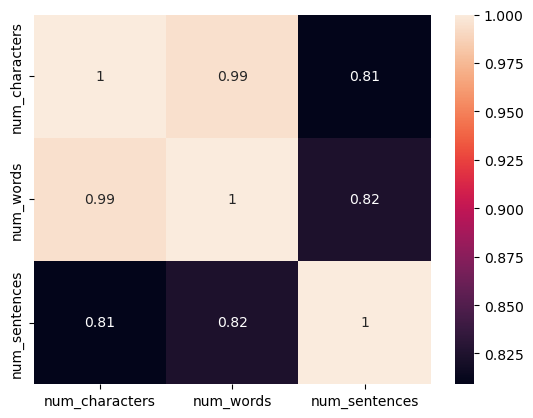

In [25]:
sns.heatmap(df.corr(),annot=True)

In [26]:
# appending num_character to our input feature col X
# X=np.hstack((X,df['num_characters'].values.reshape(-1,-1))

In [27]:
# with this we can also check which type of review have more number of words

# 3. Text Preprocessing

In [28]:
df['review'][0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [29]:
import string             # list of Punctuation
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [30]:
import nltk

In [31]:
from nltk.corpus import stopwords     # list of english stopwords
nltk.download('stopwords')
stopwords.words('english')

[nltk_data] Downloading package stopwords to C:\Users\Smit
[nltk_data]     Bhoir\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [32]:
import re

In [33]:
TAG_RE = re.compile(r'<[^>]+>')

def remove_tags(text):
    '''Removes HTML tags: replaces anything between opening and closing <> with empty space'''

    return TAG_RE.sub('', text)

In [34]:
def preprocess_text(sen):
    '''Cleans text data up, leaving only 2 or more char long non-stepwords composed of A-Z & a-z only
    in lowercase'''
    
    sentence = sen.lower()

    # Remove html tags
    sentence = remove_tags(sentence)

    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)  # When we remove apostrophe from the word "Mark's", the apostrophe is replaced by an empty space. Hence, we are left with single character "s" that we are removing here.

    # Remove multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)  # Next, we remove all the single characters and replace it by a space which creates multiple spaces in our text. Finally, we remove the multiple spaces from our text as well.

    # Remove Stopwords
    pattern = re.compile(r'\b(' + r'|'.join(stopwords.words('english')) + r')\b\s*')
    sentence = pattern.sub('', sentence)

    return sentence

In [35]:
X=df['review'].apply(preprocess_text)

In [36]:
# Sample cleaned up movie review 
X[0]

'one reviewers mentioned watching oz episode hooked right exactly happened first thing struck oz brutality unflinching scenes violence set right word go trust show faint hearted timid show pulls punches regards drugs sex violence hardcore classic use word called oz nickname given oswald maximum security state penitentary focuses mainly emerald city experimental section prison cells glass fronts face inwards privacy high agenda em city home many aryans muslims gangstas latinos christians italians irish scuffles death stares dodgy dealings shady agreements never far away would say main appeal show due fact goes shows dare forget pretty pictures painted mainstream audiences forget charm forget romance oz mess around first episode ever saw struck nasty surreal say ready watched developed taste oz got accustomed high levels graphic violence violence injustice crooked guards sold nickel inmates kill order get away well mannered middle class inmates turned prison bitches due lack street skill

In [37]:
# As we shall use Word Embeddings, stemming/lemmatization is not performed as a preprocessing step here

In [38]:
X.head()

0    one reviewers mentioned watching oz episode ho...
1    wonderful little production filming technique ...
2    thought wonderful way spend time hot summer we...
3    basically family little boy jake thinks zombie...
4    petter mattei love time money visually stunnin...
Name: review, dtype: object

In [39]:
from sklearn.preprocessing import LabelEncoder        # converting negative=0 and positive=1
encoder= LabelEncoder()

In [40]:
y=encoder.fit_transform(df['sentiment'])

In [41]:
y

array([1, 1, 1, ..., 0, 0, 0])

In [42]:
X.shape

(49582,)

In [43]:
y.shape

(49582,)

In [44]:
# appending num_character to our input feature col X
# X=np.hstack((X,df['num_characters'].values.reshape(-1,-1)))

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X_train,X_test,y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42,)

In [47]:
print(X_train.shape,X_test.shape,y_train.shape, y_test.shape)

(39665,) (9917,) (39665,) (9917,)


In [48]:
# pip install TensorFlow

In [49]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [50]:
# Embedding layer expects the words to be in numeric form 
# therefore 
# Using Tokenizer function from keras.preprocessing.text library
# Method fit_on_text trains the tokenizer 
# Method texts_to_sequences converts sentences to their numeric form

In [51]:
word_tokenizer = Tokenizer()
word_tokenizer.fit_on_texts(X_train)

X_train = word_tokenizer.texts_to_sequences(X_train)
X_test = word_tokenizer.texts_to_sequences(X_test)

In [52]:
X_train[0]

[11,
 308,
 1,
 27829,
 70,
 7539,
 55,
 4,
 425,
 225,
 197,
 199,
 4443,
 35496,
 464,
 1,
 14,
 4,
 1140,
 5983,
 1024,
 7691,
 313,
 737,
 287,
 7,
 39,
 205,
 48,
 1292,
 248,
 106,
 2588,
 1,
 4,
 115,
 61,
 1769,
 159,
 45666,
 61,
 1822,
 884,
 17,
 237,
 23,
 1114,
 27829,
 70,
 7539,
 76,
 61,
 884,
 35496,
 5675,
 1,
 231,
 231,
 97]

In [53]:
len(X_train[0])

59

In [54]:
len(X_train[1])

63

In [55]:
# Adding 1 to store dimensions for words for which no pretrained word embeddings exist
# in this extra 1 space is to store dimension of the word
vocab_length = len(word_tokenizer.word_index) + 1

vocab_length

92211

In [56]:
len(X_train)

39665

In [57]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [58]:
# Padding all reviews to fixed length 100

maxlen = 100

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [59]:
X_train[0]

array([   11,   308,     1, 27829,    70,  7539,    55,     4,   425,
         225,   197,   199,  4443, 35496,   464,     1,    14,     4,
        1140,  5983,  1024,  7691,   313,   737,   287,     7,    39,
         205,    48,  1292,   248,   106,  2588,     1,     4,   115,
          61,  1769,   159, 45666,    61,  1822,   884,    17,   237,
          23,  1114, 27829,    70,  7539,    76,    61,   884, 35496,
        5675,     1,   231,   231,    97,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0])

In [60]:
X_train[0].shape

(100,)

In [61]:
# Load GloVe word embeddings and create an Embeddings Dictionary

from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()
glove_file = open("C:/Users/Smit Bhoir/Desktop/Placements/Study content/Deep Learning/Projects/Semtiment Analysis and Rating Prediction/a2_glove.6B.100d.txt", encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
glove_file.close()

In [62]:
# Create Embedding Matrix having 100 columns 
# Containing 100-dimensional GloVe word embeddings for all words in our corpus.

embedding_matrix = zeros((vocab_length, 100))
for word, index in word_tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [63]:
embedding_matrix.shape

(92211, 100)

# 4. Model Building

Simple Neural Network

In [64]:
# pip install Tensorflow

In [65]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Dense, Flatten, GlobalMaxPooling1D, Embedding, Conv1D, LSTM

In [66]:
# Neural Network architecture

snn_model = Sequential()
embedding_layer = Embedding(vocab_length, 100, weights=[embedding_matrix], input_length=maxlen, trainable=False)


snn_model.add(embedding_layer)

snn_model.add(Flatten())
snn_model.add(Dense(1, activation='sigmoid'))

C:\Users\Smit Bhoir\anaconda3\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [67]:
# Model compiling

snn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

print(snn_model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │       9,221,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,221,100 (35.18 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 9,221,100 (35.18 MB)

None


In [68]:
# Model training

snn_model_history = snn_model.fit(X_train, y_train, batch_size=128, epochs=6, verbose=1, validation_split=0.2)

Epoch 1/6
248/248 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - acc: 0.6625 - loss: 0.6133 - val_acc: 0.7505 - val_loss: 0.5154
Epoch 2/6
248/248 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - acc: 0.8026 - loss: 0.4449 - val_acc: 0.7573 - val_loss: 0.5054
Epoch 3/6
248/248 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - acc: 0.8242 - loss: 0.4006 - val_acc: 0.7490 - val_loss: 0.5365
Epoch 4/6
248/248 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - acc: 0.8346 - loss: 0.3826 - val_acc: 0.7537 - val_loss: 0.5362
Epoch 5/6
248/248 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - acc: 0.8430 - loss: 0.3630 - val_acc: 0.7508 - val_loss: 0.5420
Epoch 6/6
248/248 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - acc: 0.8531 - loss: 0.3463 - val_acc: 0.7491 - val_loss: 0.5618


In [69]:
# Predictions on the Test Set

score = snn_model.evaluate(X_test, y_test, verbose=1)

310/310 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - acc: 0.7469 - loss: 0.5572


In [70]:
# Model Performance

print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.5588942170143127
Test Accuracy: 0.7472018003463745


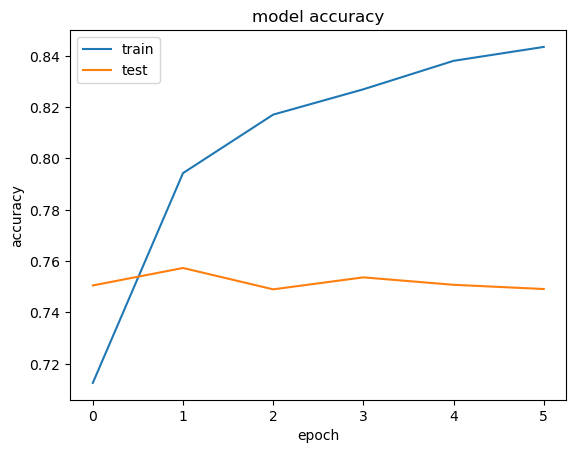

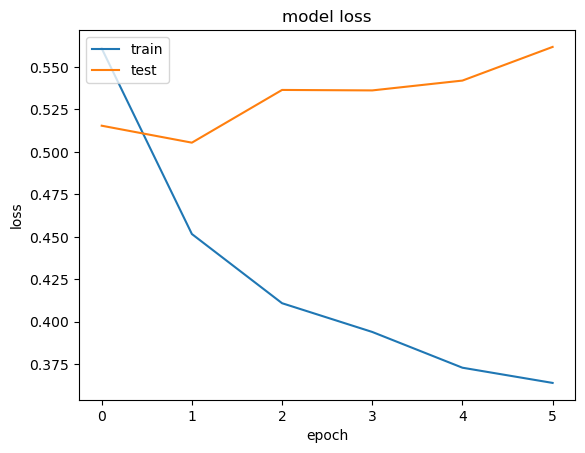

In [71]:
# Model Performance Charts

import matplotlib.pyplot as plt

plt.plot(snn_model_history.history['acc'])
plt.plot(snn_model_history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(snn_model_history.history['loss'])
plt.plot(snn_model_history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

Convolutional Neural Network

In [72]:
from keras.layers import Conv1D

In [73]:
# Neural Network architecture

cnn_model = Sequential()

embedding_layer = Embedding(vocab_length, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)
cnn_model.add(embedding_layer)

cnn_model.add(Conv1D(128, 5, activation='relu'))
cnn_model.add(GlobalMaxPooling1D())
cnn_model.add(Dense(1, activation='sigmoid'))

In [74]:
# Model compiling

cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
print(cnn_model.summary())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │       9,221,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d                 │ ?                           │     0 (unbuilt) │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,221,100 (35.18 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 9,221,100 (35.18 MB)

None


In [75]:
# Model training

cnn_model_history = cnn_model.fit(X_train, y_train, batch_size=128, epochs=6, verbose=1, validation_split=0.2)

Epoch 1/6
248/248 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - acc: 0.7077 - loss: 0.5490 - val_acc: 0.8286 - val_loss: 0.3826
Epoch 2/6
248/248 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - acc: 0.8598 - loss: 0.3328 - val_acc: 0.8389 - val_loss: 0.3619
Epoch 3/6
248/248 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - acc: 0.8896 - loss: 0.2771 - val_acc: 0.8462 - val_loss: 0.3491
Epoch 4/6
248/248 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - acc: 0.9161 - loss: 0.2297 - val_acc: 0.8480 - val_loss: 0.3423
Epoch 5/6
248/248 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - acc: 0.9361 - loss: 0.1946 - val_acc: 0.8523 - val_loss: 0.3425
Epoch 6/6
248/248 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - acc: 0.9588 - loss: 0.1543 - val_acc: 0.8506 - val_loss: 0.3471


In [76]:
# Predictions on the Test Set

score = cnn_model.evaluate(X_test, y_test, verbose=1)

310/310 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.8520 - loss: 0.3569


In [77]:
# Model Performance

print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.3606919050216675
Test Accuracy: 0.8486437201499939


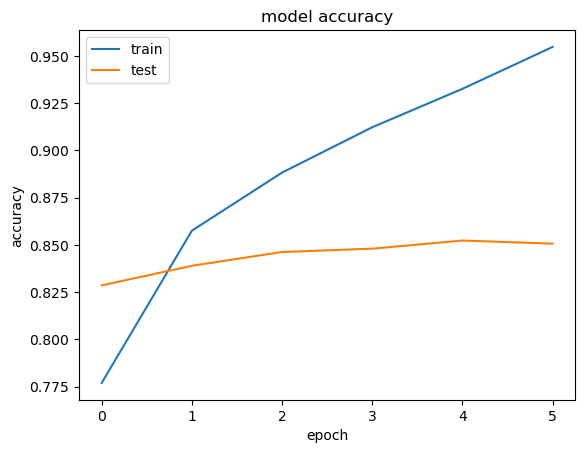

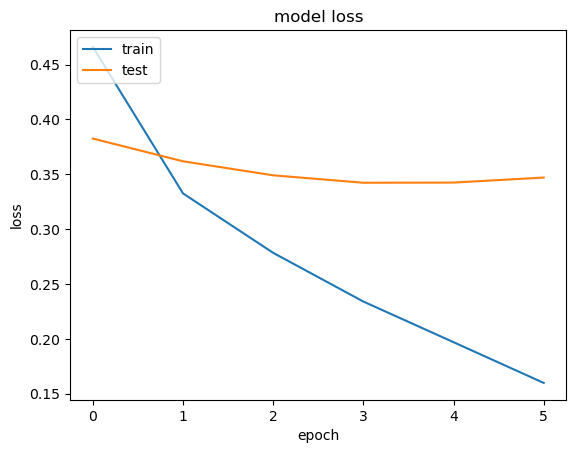

In [78]:
# Model Performance Charts

import matplotlib.pyplot as plt

plt.plot(cnn_model_history.history['acc'])
plt.plot(cnn_model_history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

plt.plot(cnn_model_history.history['loss'])
plt.plot(cnn_model_history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

Recurrent Neural Network (LSTM)

In [79]:
from keras.layers import LSTM
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dropout

In [80]:
# Neural Network architecture

lstm_model = Sequential()
embedding_layer = Embedding(vocab_length, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)

lstm_model.add(embedding_layer)

lstm_model.add(LSTM(128))

lstm_model.add(Dropout(0.4)) 


lstm_model.add(Dense(1, activation='sigmoid'))

In [81]:
# Model compiling

lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
print(lstm_model.summary())

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ ?                           │       9,221,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,221,100 (35.18 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 9,221,100 (35.18 MB)

None


In [82]:
# Model Training

lstm_model_history = lstm_model.fit(X_train, y_train, batch_size=128, epochs=20, verbose=1, validation_split=0.2)

Epoch 1/20
248/248 ━━━━━━━━━━━━━━━━━━━━ 36s 139ms/step - acc: 0.6758 - loss: 0.5844 - val_acc: 0.8073 - val_loss: 0.4424
Epoch 2/20
248/248 ━━━━━━━━━━━━━━━━━━━━ 33s 134ms/step - acc: 0.8054 - loss: 0.4406 - val_acc: 0.8267 - val_loss: 0.3956
Epoch 3/20
248/248 ━━━━━━━━━━━━━━━━━━━━ 33s 135ms/step - acc: 0.8304 - loss: 0.3882 - val_acc: 0.8462 - val_loss: 0.3525
Epoch 4/20
248/248 ━━━━━━━━━━━━━━━━━━━━ 34s 138ms/step - acc: 0.8534 - loss: 0.3459 - val_acc: 0.8341 - val_loss: 0.3679
Epoch 5/20
248/248 ━━━━━━━━━━━━━━━━━━━━ 33s 135ms/step - acc: 0.8645 - loss: 0.3276 - val_acc: 0.8611 - val_loss: 0.3407
Epoch 6/20
248/248 ━━━━━━━━━━━━━━━━━━━━ 33s 134ms/step - acc: 0.8748 - loss: 0.3020 - val_acc: 0.8627 - val_loss: 0.3521
Epoch 7/20
248/248 ━━━━━━━━━━━━━━━━━━━━ 34s 136ms/step - acc: 0.8825 - loss: 0.2895 - val_acc: 0.8641 - val_loss: 0.3369
Epoch 8/20
248/248 ━━━━━━━━━━━━━━━━━━━━ 34s 136ms/step - acc: 0.8932 - loss: 0.2684 - val_acc: 0.8627 - val_loss: 0.3418
Epoch 9/20
248/248 ━━━━━━━━━━━━━

In [83]:
# Predictions on the Test Set

score = lstm_model.evaluate(X_test, y_test, verbose=1)

310/310 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - acc: 0.8454 - loss: 0.5277


In [84]:
# Model Performance

print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.5209667682647705
Test Accuracy: 0.8471311926841736


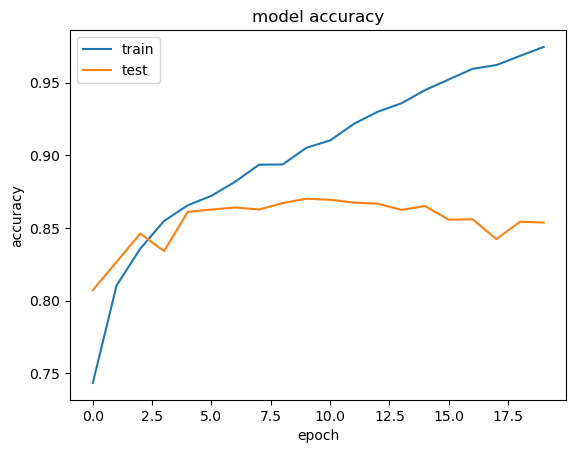

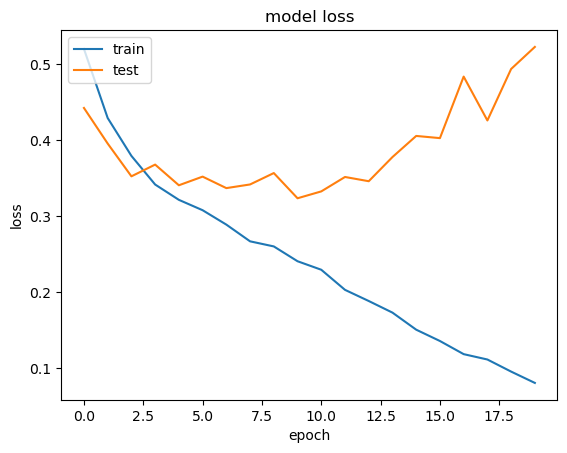

In [85]:
# Model Performance Charts

import matplotlib.pyplot as plt

plt.plot(lstm_model_history.history['acc'])
plt.plot(lstm_model_history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(lstm_model_history.history['loss'])
plt.plot(lstm_model_history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

Bi-Directional LSTM

In [86]:
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.regularizers import l2

In [87]:
# Neural Network architecture

bid_lstm_model = Sequential()
embedding_layer = Embedding(vocab_length,100, weights=[embedding_matrix], input_length=maxlen , trainable=False)

bid_lstm_model.add(embedding_layer)


bid_lstm_model.add(Bidirectional(LSTM(128, return_sequences=True, dropout=0.2, recurrent_dropout=0.2)))
bid_lstm_model.add(Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2)))

bid_lstm_model.add(Dense(6,activation='relu', kernel_regularizer=l2(0.01))) 

bid_lstm_model.add(Dense(1, activation='sigmoid'))

In [88]:

# Model compiling

bid_lstm_model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])
print(lstm_model.summary())

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ (None, 100, 100)            │       9,221,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 128)                 │         117,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,573,233 (36.52 MB)

 Trainable params: 117,377 (458.50 KB)

 Non-trainable params: 9,221,100 (35.18 MB)

 Optimizer params: 234,756 (917.02 KB)

None


In [89]:
# Model Training

bid_lstm_model_history = lstm_model.fit(X_train, y_train, batch_size=128, epochs=20, verbose=1, validation_split=0.2)

Epoch 1/20
248/248 ━━━━━━━━━━━━━━━━━━━━ 35s 140ms/step - acc: 0.9772 - loss: 0.0730 - val_acc: 0.8583 - val_loss: 0.5496
Epoch 2/20
248/248 ━━━━━━━━━━━━━━━━━━━━ 35s 140ms/step - acc: 0.9778 - loss: 0.0708 - val_acc: 0.8535 - val_loss: 0.5208
Epoch 3/20
248/248 ━━━━━━━━━━━━━━━━━━━━ 35s 139ms/step - acc: 0.9848 - loss: 0.0570 - val_acc: 0.8476 - val_loss: 0.5072
Epoch 4/20
248/248 ━━━━━━━━━━━━━━━━━━━━ 35s 139ms/step - acc: 0.9855 - loss: 0.0554 - val_acc: 0.8577 - val_loss: 0.5800
Epoch 5/20
248/248 ━━━━━━━━━━━━━━━━━━━━ 36s 145ms/step - acc: 0.9878 - loss: 0.0436 - val_acc: 0.8460 - val_loss: 0.5976
Epoch 6/20
248/248 ━━━━━━━━━━━━━━━━━━━━ 36s 145ms/step - acc: 0.9821 - loss: 0.0564 - val_acc: 0.8490 - val_loss: 0.5584
Epoch 7/20
248/248 ━━━━━━━━━━━━━━━━━━━━ 36s 145ms/step - acc: 0.9852 - loss: 0.0495 - val_acc: 0.8565 - val_loss: 0.6166
Epoch 8/20
248/248 ━━━━━━━━━━━━━━━━━━━━ 35s 142ms/step - acc: 0.9862 - loss: 0.0472 - val_acc: 0.8519 - val_loss: 0.6350
Epoch 9/20
248/248 ━━━━━━━━━━━━━

In [90]:
# Predictions on the Test Set

score = bid_lstm_model.evaluate(X_test, y_test, verbose=1)

310/310 ━━━━━━━━━━━━━━━━━━━━ 16s 42ms/step - accuracy: 0.4978 - loss: 0.7605


In [91]:
# Model Performance

print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.7604037523269653
Test Accuracy: 0.49803367257118225


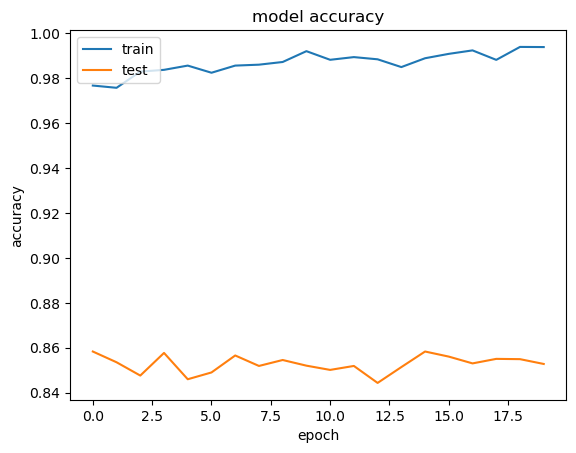

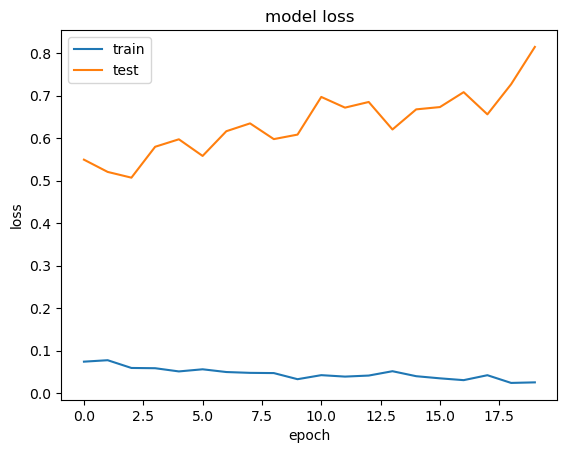

In [92]:
# Model Performance Charts

import matplotlib.pyplot as plt

plt.plot(bid_lstm_model_history.history['acc'])
plt.plot(bid_lstm_model_history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(bid_lstm_model_history.history['loss'])
plt.plot(bid_lstm_model_history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# 5. Model Improvment techniques

1. Dropout

2. Regularisation

3. Increase Model Depth: Adding more LSTM layers can help the model learn more complex patterns. However, remember to set return_sequences=True for all LSTM layers except the last one.


# 6. Evaluation: Making Predictions on Live IMDb data

In [93]:
# Load sample IMDb reviews csv, having ~6 movie reviews, along with their IMDb rating

sample_reviews = pd.read_csv("C:/Users/Smit Bhoir/Desktop/Placements/Study content/Deep Learning/Projects/Semtiment Analysis and Rating Prediction/a2_IMDb_Unseen_Reviews.csv")

sample_reviews.head(6)

,Unnamed: 0,Movie,Review Text,IMDb Rating
0,0,Ex Machina,Intelligent Movie.\nThis movie is obviously al...,9
1,1,Ex Machina,Extraordinary and thought-provoking.\n'Ex mach...,10
2,2,Ex Machina,"Poor story, only reasonable otherwise.\nIf I h...",3
3,3,Ex Machina,Had Great Potential.\nThis movie is one of the...,1
4,4,Eternals,Amazing visuals and philosophical concepts!\n\...,10
5,5,Eternals,Worst MCU film ever\n\nFollowing the events of...,3


In [94]:
# Preprocess review text with earlier defined preprocess_text function

unseen_reviews = sample_reviews['Review Text']

unseen_processed = []
for review in unseen_reviews:
  review = preprocess_text(review)
  unseen_processed.append(review)

In [95]:
# Tokenising instance with earlier trained tokeniser
unseen_tokenized = word_tokenizer.texts_to_sequences(unseen_processed)

# Pooling instance to have maxlength of 100 tokens
unseen_padded = pad_sequences(unseen_tokenized, padding='post', maxlen=maxlen)

In [96]:
# Passing tokenised instance to the LSTM model for predictions
unseen_sentiments = lstm_model.predict(unseen_padded)

unseen_sentiments

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


array([[9.9976313e-01],
       [9.9999982e-01],
       [7.3515420e-04],
       [1.0788390e-04],
       [9.9997705e-01],
       [4.6551271e-05]], dtype=float32)

In [97]:
# Writing model output file back to Google Drive

sample_reviews['Predicted Sentiments'] = np.round(unseen_sentiments*10,1)

df_prediction_sentiments = pd.DataFrame(sample_reviews['Predicted Sentiments'], columns = ['Predicted Sentiments'])
df_movie                 = pd.DataFrame(sample_reviews['Movie'], columns = ['Movie'])
df_review_text           = pd.DataFrame(sample_reviews['Review Text'], columns = ['Review Text'])
df_imdb_rating           = pd.DataFrame(sample_reviews['IMDb Rating'], columns = ['IMDb Rating'])


dfx=pd.concat([df_movie, df_review_text, df_imdb_rating, df_prediction_sentiments], axis=1)

dfx.head(6)

,Movie,Review Text,IMDb Rating,Predicted Sentiments
0,Ex Machina,Intelligent Movie.\nThis movie is obviously al...,9,10.0
1,Ex Machina,Extraordinary and thought-provoking.\n'Ex mach...,10,10.0
2,Ex Machina,"Poor story, only reasonable otherwise.\nIf I h...",3,0.0
3,Ex Machina,Had Great Potential.\nThis movie is one of the...,1,0.0
4,Eternals,Amazing visuals and philosophical concepts!\n\...,10,10.0
5,Eternals,Worst MCU film ever\n\nFollowing the events of...,3,0.0


In [ ]:
# 1. Data Cleaning
# 2. EDA
# 3. Text Preprocessing
# 3.a. Preparing Embedding Layer
# 4. Model Building
# 4.a.Simple Neural Network
# 4.b.1D Convolutional Neural Network
# 4.c.RNN (LSTM)
# 4.d.Bi-Directional LSTM
# 5. Improvment
# 6. Evaluation
# 7. Pipeline
# 8. Deployment